In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df_tv = pd.read_csv('Data/quasar_train.csv')

In [3]:
df_tv.head()

,1150.000,1151.000,1152.000,1153.000,1154.000,1155.000,1156.000,1157.000,1158.000,1159.000,...,1590.000,1591.000,1592.000,1593.000,1594.000,1595.000,1596.000,1597.000,1598.000,1599.000
0,0.629,1.910,0.976,2.161,0.964,2.068,1.630,1.716,2.378,-0.540,...,0.532,1.462,0.323,2.515,1.194,0.654,1.056,1.450,0.203,0.382
1,-0.161,1.830,0.609,1.932,0.932,0.857,0.978,1.032,1.793,1.455,...,0.961,1.407,1.296,0.943,1.055,2.265,1.053,1.439,0.767,-0.552
2,-0.085,-1.304,0.691,-0.800,-1.090,1.087,0.734,1.198,1.122,0.742,...,0.447,1.139,0.422,1.248,1.047,0.500,1.514,1.623,1.202,0.924
3,1.283,-0.487,0.660,0.167,-1.217,1.535,2.264,0.220,0.865,-0.723,...,0.714,1.173,1.579,0.477,0.781,0.525,2.466,1.493,1.503,0.698
4,-0.107,0.328,0.681,2.500,0.083,1.876,2.359,1.122,0.584,0.835,...,1.427,2.685,1.152,1.365,0.280,2.246,1.249,1.304,0.578,0.831


In [4]:
df_tv.shape

(200, 450)

In [5]:
cols_tv = df_tv.columns.values.astype('float').astype('int')

In [6]:
cols_tv.shape

(450,)

In [7]:
df_test = pd.read_csv('Data/quasar_test.csv')
cols_test = df_test.columns.values.astype('float').astype('int')

In [8]:
df_test.head()

,1150.00,1151.00,1152.00,1153.00,1154.00,1155.00,1156.00,1157.00,1158.00,1159.00,...,1590.00,1591.00,1592.00,1593.00,1594.00,1595.00,1596.00,1597.00,1598.00,1599.00
0,0.025,1.460,-0.057,1.37,2.090,1.150,-0.182,0.351,1.57,1.970,...,0.525,0.574,1.570,1.280,0.963,1.04,1.160,0.555,0.733,1.180
1,1.210,0.375,0.695,-0.09,0.275,-0.128,0.043,-0.054,1.40,1.950,...,0.658,0.579,1.670,1.230,1.230,1.19,1.220,0.932,1.280,0.338
2,1.380,-0.436,2.700,1.18,1.850,0.374,2.290,1.110,1.06,1.270,...,0.672,0.483,1.350,1.450,2.810,1.28,0.893,1.980,0.744,0.610
3,0.427,0.509,1.060,0.80,0.537,0.288,2.790,2.120,1.51,-0.937,...,0.928,1.020,0.462,1.040,1.070,1.64,1.250,0.706,0.673,1.480
4,-0.371,0.773,-0.621,1.84,0.284,-0.009,1.910,1.900,1.64,0.803,...,1.240,0.867,1.460,0.035,1.880,1.74,-0.225,0.711,-0.571,0.786


In [9]:
cols_test.shape

(450,)

In [10]:
assert (cols_tv == cols_test).all()
df_tv.columns = cols_tv
df_test.columns = cols_test
wave_lens = cols_tv

In [11]:
df_test.shape

(50, 450)

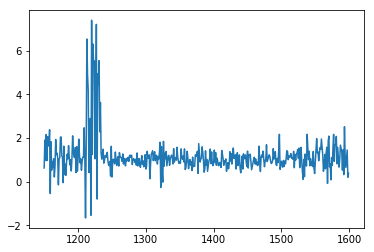

In [12]:
plt.plot(wave_lens, df_tv.loc[0])

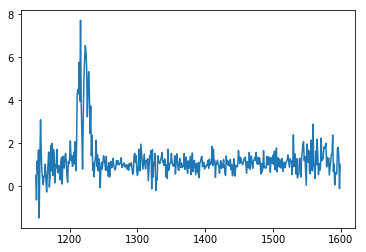

In [13]:
plt.plot(wave_lens, df_test.loc[29])

Implement $\theta = (X^T X)^{-1} X^T \vec{y}$ for normal cases, and $\theta = (X^T W X)^{-1} X^T W \vec{y}$ for general cases.

In [14]:
def optim(X, y, W=None):
    if W is None:
        return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    else:
        return np.linalg.inv(X.T.dot(W).dot(X)).dot(X.T).dot(W).dot(y)

In [15]:
x0 = np.ones(df_tv.shape[1])
x1 = wave_lens
y = df_tv.head(1).values.ravel()
X = np.stack([x0, x1]).T

In [16]:
print(X.shape, y.shape)

(450, 2) (450,)


In [17]:
theta = optim(X, y)

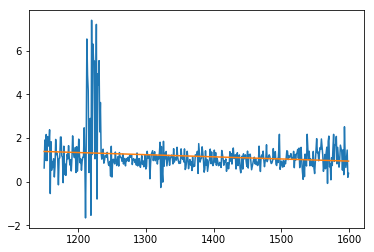

In [18]:
plt.plot(wave_lens, df_tv.loc[0].values)
plt.plot(wave_lens, X.dot(theta))

---

In [19]:
def construct_weight_matrix(X, x_eval, tau=5):
    return np.diag(np.exp(- (X[:,1] - x_eval[1]) **2 / (2 * tau ** 2)))

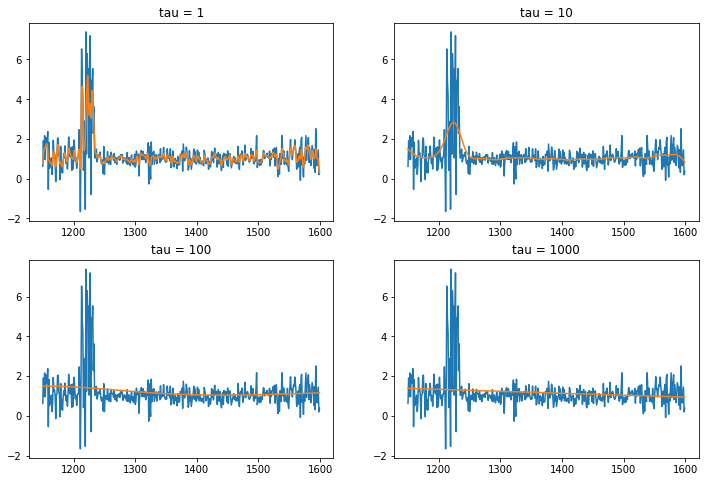

In [20]:
# Varing the values of tau and seeing its effect:
fig, axes = plt.subplots(2,2,figsize=(12,8))
axes = axes.ravel()

for k, tau in enumerate([1,10,100,1000]):
    ax = axes[k]
    preds = []
    
    for x_eval in X:
        W = construct_weight_matrix(X, x_eval, tau=tau)
        theta = optim(X,y,W)
        preds.append(theta.dot(x_eval))
        
    ax.plot(wave_lens, df_tv.loc[0].values)
    ax.plot(wave_lens, preds)
    ax.set_title('tau = {0}'.format(tau))

So when $\tau$ is small, the prediction becomes very sensitive to the distance between the data point to be evaluated and the training data. Hence, the prediction also appears to be noisy. When $\tau$ is big, the opposite happens.

In [21]:
## Smoothing all spectra

In [22]:
def lwr_single(X, y, x, tau):
    """Locally weighted regression for single observation"""
    W = construct_weight_matrix(X, x, tau=tau)
    theta = optim(X, y, W)
    return theta

In [23]:
def lwr(X, y, xs, tau):
    """LWS for multiple xs"""
    theta = []
    for x in xs:
        th = lwr_single(X, y, x, tau)
        theta.append(th)
        
    return theta

In [24]:
## Smoothed spectrum

In [25]:
fs_tv = []
x0 = np.ones(df_tv.shape[1])
x1 = wave_lens
X  = np.stack([x0, x1]).T
# used for calculating distances d(f1, f2)
for k, row in df_tv.iterrows():
    print(k, end=',')
    y = row.values
    thetas = lwr(X, y, X, tau=5)
    prd = [_t.dot(_x) for (_t, _x) in zip(thetas, X)]
    fs_tv.append(prd)

df_fs_tv = pd.DataFrame(fs_tv, columns=df_tv.columns)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,

In [26]:
y.shape

(450,)

In [27]:
df_fs_tv.head()

,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,1.354578,1.411428,1.444183,1.454483,1.444648,1.417679,1.377181,1.327194,1.271964,1.215665,...,1.177875,1.153110,1.123592,1.087366,1.042372,0.986544,0.917909,0.834687,0.735374,0.618808
1,0.863030,0.934992,0.987481,1.024020,1.048026,1.062757,1.071234,1.076121,1.079601,1.083260,...,1.152844,1.144768,1.134039,1.116679,1.088010,1.042846,0.975691,0.880942,0.753086,0.586869
2,-0.541991,-0.387919,-0.237598,-0.094958,0.037007,0.156429,0.262619,0.355977,0.437780,0.509873,...,0.990094,0.992039,1.001164,1.017772,1.041702,1.072248,1.108119,1.147456,1.187883,1.226617
3,0.315311,0.350667,0.399682,0.457496,0.520002,0.583942,0.646924,0.707364,0.764344,0.817449,...,1.016987,1.037521,1.064515,1.097674,1.136054,1.178049,1.221415,1.263298,1.300281,1.328453
4,0.557010,0.719105,0.844582,0.937089,1.001121,1.041749,1.064305,1.074050,1.075866,1.074013,...,1.359554,1.340186,1.317625,1.290164,1.255991,1.213389,1.160878,1.097299,1.021835,0.933995


In [28]:
df_fs_tv.shape

(200, 450)

In [29]:
# smoothed spectrum
fs_test = []
x0 = np.ones(df_test.shape[1])
x1 = wave_lens
X = np.stack([x0, x1]).T
# used for calculating distances d(f1, f2)
for k , row in df_test.iterrows():
    print(k, end=',')
    y = row.values
    thetas = lwr(X, y, X, tau=5)
    prd = [_t.dot(_x) for (_t, _x) in zip(thetas,X)]
    fs_test.append(prd)
    
df_fs_test = pd.DataFrame(fs_test, columns=df_test.columns)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,

In [30]:
wl_right = wave_lens[wave_lens >= 1300]
wl_left = wave_lens[wave_lens < 1200]

In [31]:
df_fs_tv_r = df_fs_tv[wl_right]
df_fs_tv_l = df_fs_tv[wl_left]

In [32]:
df_fs_tv_l.shape

(200, 50)

In [33]:
df_fs_tv_r.shape

(200, 300)

In [34]:
def ker(t):
    return np.max(1-t, 0)

In [35]:
# It's very similar to k-nearest-neighbour algorithm,
# it select the neihbours based on distances calculated from the right spectrum,
# and then calculate the weighted (based on distances) average of left spectrum

num_neighb = 3 # number of neighbours to consider
errors = []
preds_tv = []

for k, row in df_fs_tv_r.iterrows():
    dists = ((df_fs_tv_r - row) ** 2).sum(axis=1)
    max_d = dists.max()
    neighb_ds = dists.sort_values()[:num_neighb]
    
    p1 = np.sum([ker(d / max_d) * df_fs_tv_l.loc[idx] for (idx, d) in neighb_ds.iteritems()], axis = 0)
    p2 = np.sum([ker(d / max_d) for (idx, d) in neighb_ds.iteritems()])
    
    f_left_hat = p1/p2
    preds_tv.append(f_left_hat)
    error = np.sum((f_left_hat - df_fs_tv_l.loc[k])**2)
    errors.append(error)


In [36]:
np.mean(errors)

1.0663958023831606

In [37]:
## Visualize some predictions

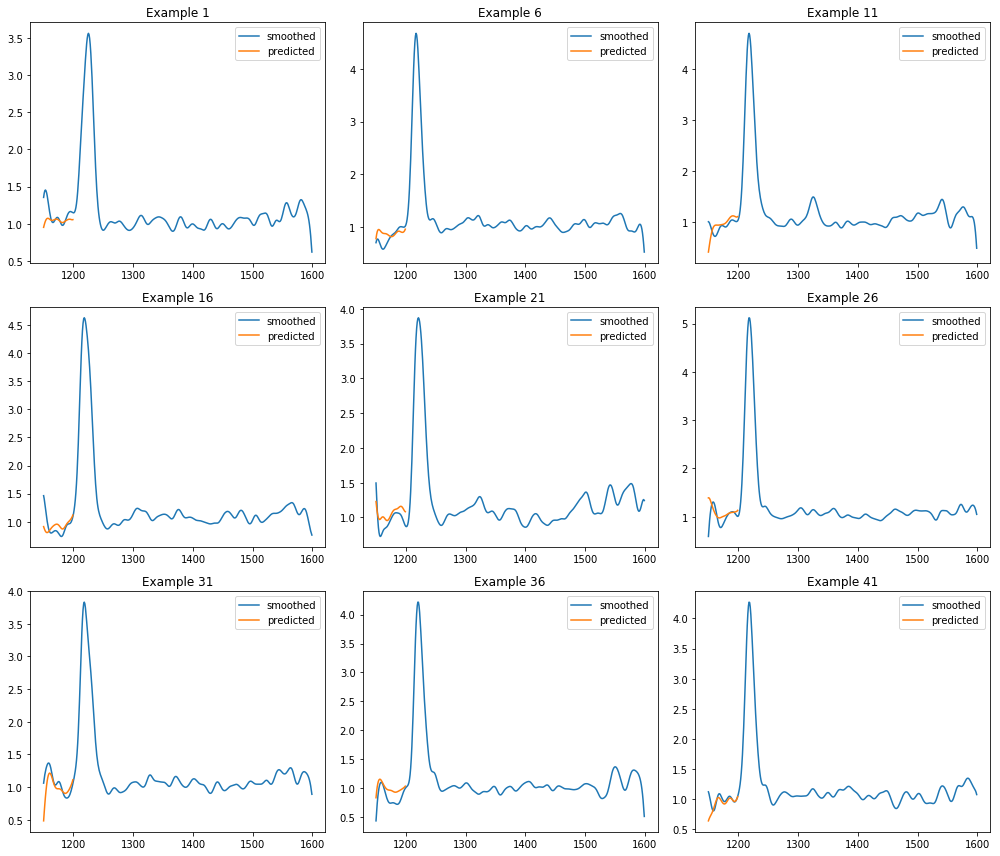

In [38]:
fig, axes = plt.subplots(3,3,figsize=(14,12))
axes = axes.ravel()

for k, idx in enumerate([0,5,10,15,20,25,30,35,40]):
    ax = axes[k]
    ax.plot(wave_lens, df_fs_tv.loc[idx], label='smoothed')
    ax.plot(wl_left, preds_tv[idx], label='predicted')
    ax.legend()
    ax.set_title("Example {0}".format(idx + 1))
    
plt.tight_layout()

In [39]:
# Predict on test data set

In [40]:
df_fs_test_r = df_fs_test[wl_right]
df_fs_test_l = df_fs_test[wl_left]

In [41]:
err_test = []
preds_test = []

for k, row in df_fs_test_r.iterrows():
    dists = ((df_fs_test_r - row) ** 2).sum(axis=1)
    max_d = dists.max()
    neighb_ds = dists.sort_values()[:num_neighb]
    
    p1 = np.sum([ker(d / max_d) * df_fs_tv_l.loc[idx] for (idx, d) in neighb_ds.iteritems()], axis=0)
    p2 = np.sum([ker(d / max_d) for (idx, d) in neighb_ds.iteritems()])
    f_left_hat = p1/p2
    preds_test.append(f_left_hat)
    err = np.sum((f_left_hat - df_fs_test_l.loc[k]) ** 2)
    err_test.append(err)

In [42]:
np.mean(err_test)

3.0385154311508815

Plot for 9 test examples, including 1, 6

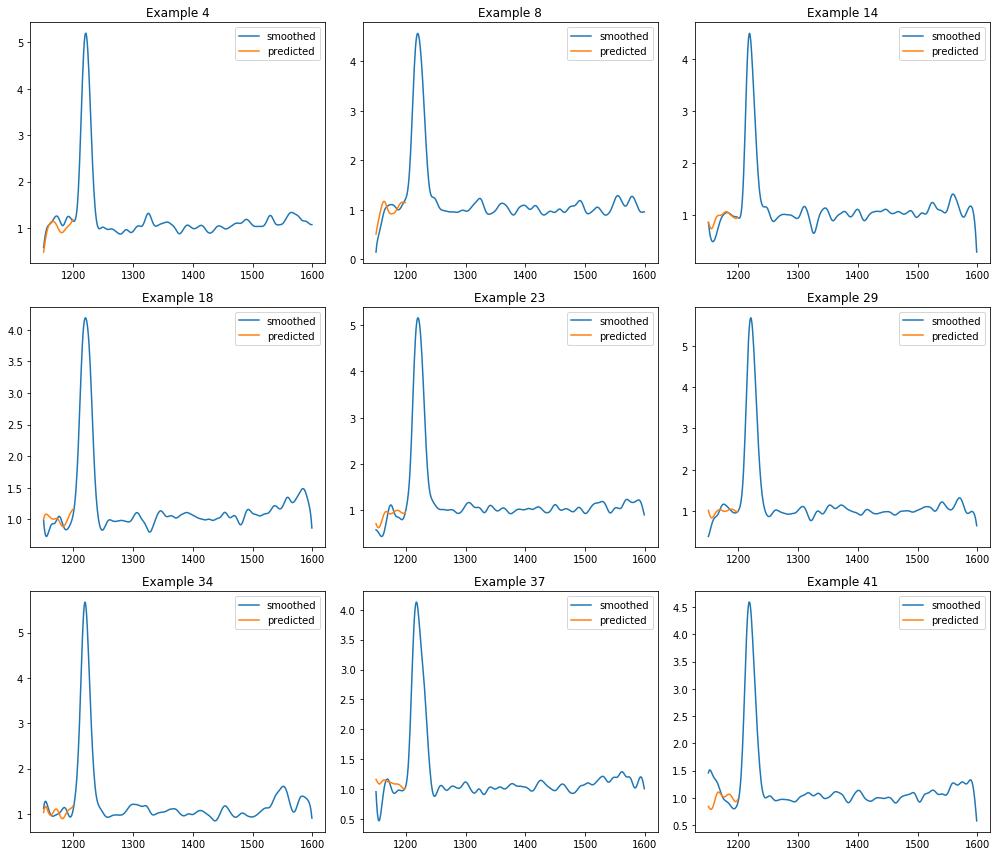

In [43]:
fig, axes = plt.subplots(3, 3, figsize=(14, 12))
axes = axes.ravel()
for k, idx in enumerate([3, 7, 13, 17, 22, 28, 33, 36, 40]):
    ax = axes[k]
    ax.plot(wave_lens, df_fs_test.loc[idx], label='smoothed')
    ax.plot(wl_left, preds_test[idx], label='predicted')
    ax.legend()
    ax.set_title('Example {0}'.format(idx + 1))
plt.tight_layout()

Overall, the prediction is poor, for both training and testing data. It seems that Example 1 and 6 (requested in the problem set) are two of the better ones